# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30],
                             'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [3]:
#plt.scatter(x=student_data["Age"], y=student_data["Tardies"])

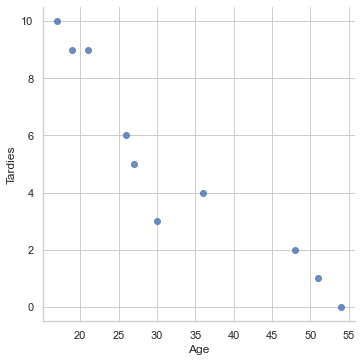

In [4]:
sns.lmplot( x="Age", y="Tardies", data=student_data, fit_reg=False,  legend=False)

### La recta correspondiente a la nube de puntos de la distribución es una recta decreciente. Cuanto màs aumenta una variable (Age), más disminuye la otra (Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

### The older you are, the less tardies you have.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
cov_mat = student_data.cov()
cov_mat

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [8]:
print("covanriance is: ", round((cov_mat.loc["Age", "Tardies"]),4))

covanriance is:  -45.5667


### La covarianza es negativa, entonces existe una relación lineal inversa o negativa entre Age y Tardies. Esto es, a mayores valores de X, en promedio tenemos menores valores de Y y viceversa. Cuanto mayor sea la edad, menor es Tardies.

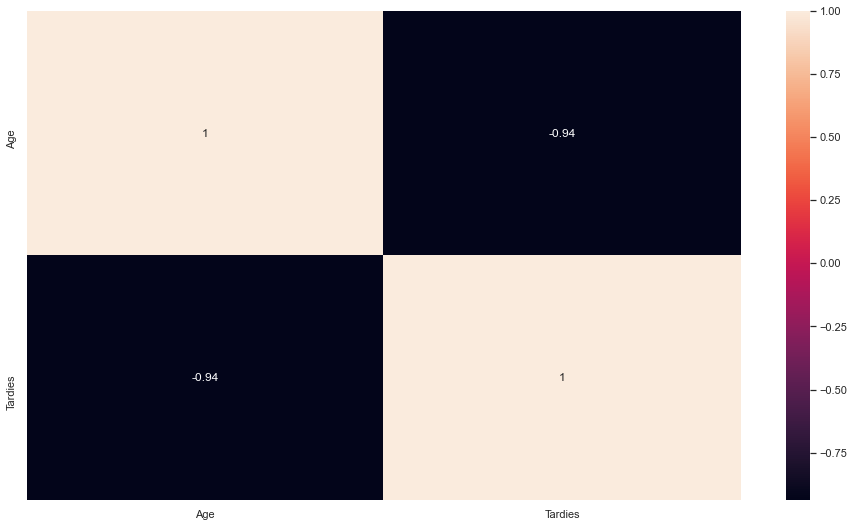

In [9]:
correlation_mat = student_data.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [10]:
#C = np.corrcoef(x=student_data["Age"], y=student_data["Tardies"])
#print(C)

In [11]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


### Fuerte Correlación inversa
### La correlación inversa se da cuando al aumentar una de las variables la otra disminuye.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
results=smf.ols('Tardies ~ Age', data=student_data).fit()
results.summary()

C:\Users\pinil\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        09:21:36   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

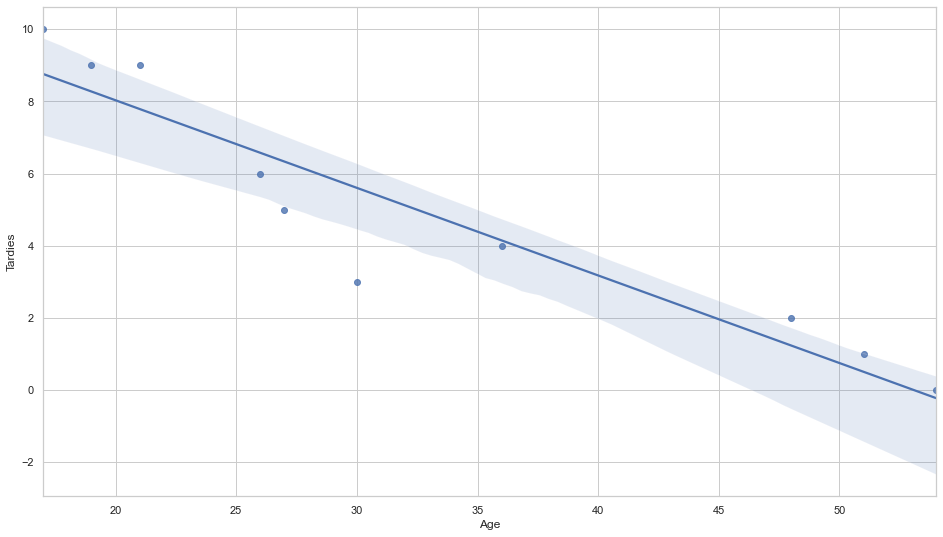

In [13]:
sns.regplot(x=student_data.Age, y=student_data.Tardies);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

### Correct, it looks like you can predict the 88 % of tardies based on the age as thee R-square says.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
vehiclesCopy = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].copy(deep=True)
vehiclesCopy

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [16]:
vehicled_sorted=vehiclesCopy.sort_values(['Year', 'Combined MPG'],
              ascending = [True, True])
vehicled_sorted

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
9068,1984,8.0,36.623333,9,3700,987.444444
11807,1984,8.0,36.623333,9,3700,987.444444
11936,1984,8.0,36.623333,9,3700,987.444444
8705,1984,8.0,32.961000,10,3350,888.700000
8909,1984,8.0,32.961000,10,3350,888.700000
...,...,...,...,...,...,...
21134,2017,4.0,7.847857,42,800,212.000000
6497,2017,4.0,7.165435,46,700,194.000000
17058,2017,4.0,6.866875,48,700,183.000000
33278,2017,4.0,6.338654,52,650,171.000000


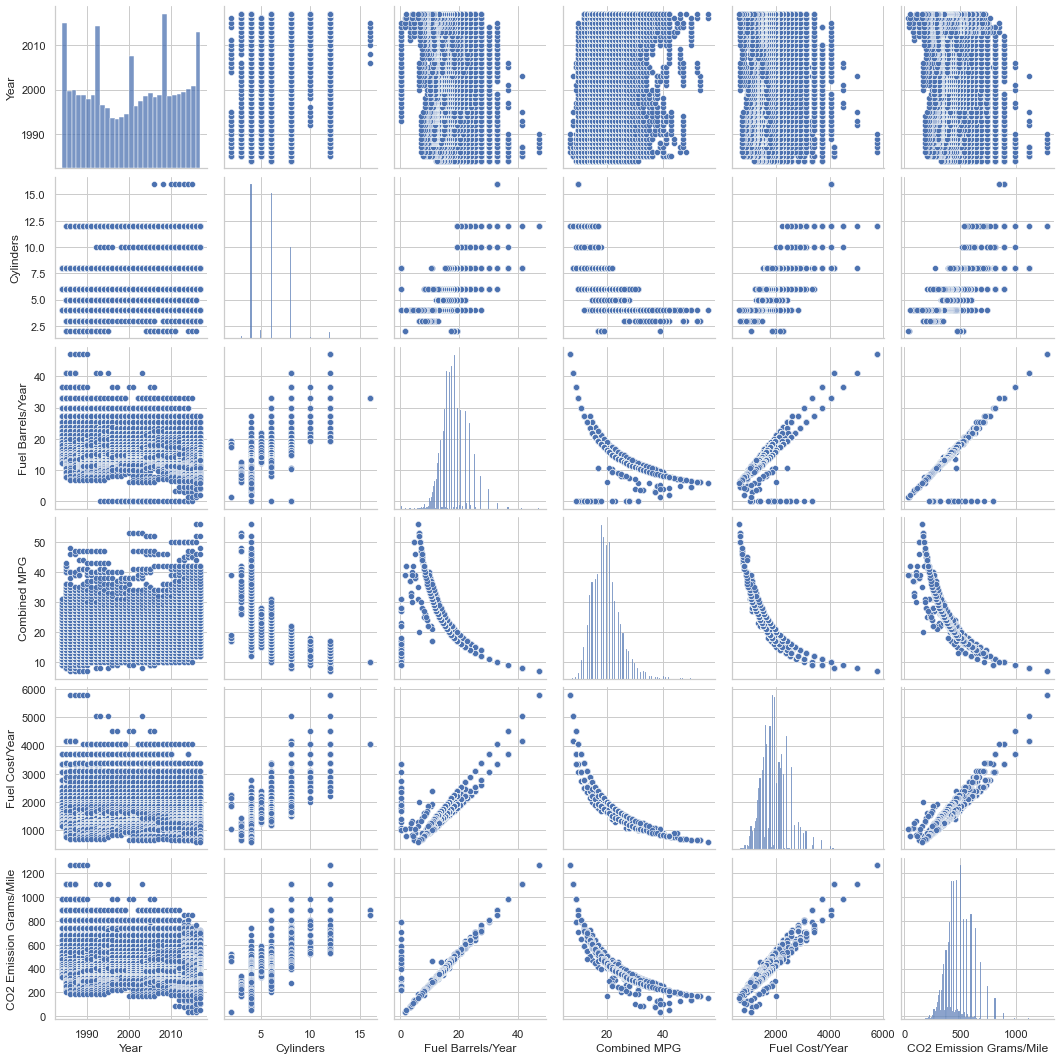

In [17]:
sns.pairplot(vehicled_sorted);

In [18]:
corr_matrix =vehicled_sorted.corr()
corr_matrix 

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [19]:
corr_matrix['Year'].sort_values(ascending=False)

Year                       1.000000
Combined MPG               0.204751
Cylinders                  0.082469
Fuel Cost/Year            -0.091913
Fuel Barrels/Year         -0.221084
CO2 Emission Grams/Mile   -0.222300
Name: Year, dtype: float64

In [20]:
corr_matrix['Cylinders'].sort_values(ascending=False)

Cylinders                  1.000000
Fuel Cost/Year             0.778153
CO2 Emission Grams/Mile    0.752393
Fuel Barrels/Year          0.739517
Year                       0.082469
Combined MPG              -0.698648
Name: Cylinders, dtype: float64

In [21]:
corr_matrix['Fuel Barrels/Year'].sort_values(ascending=False)

Fuel Barrels/Year          1.000000
CO2 Emission Grams/Mile    0.986189
Fuel Cost/Year             0.916208
Cylinders                  0.739517
Year                      -0.221084
Combined MPG              -0.909743
Name: Fuel Barrels/Year, dtype: float64

In [22]:
corr_matrix['Combined MPG'].sort_values(ascending=False)

Combined MPG               1.000000
Year                       0.204751
Cylinders                 -0.698648
Fuel Cost/Year            -0.875185
Fuel Barrels/Year         -0.909743
CO2 Emission Grams/Mile   -0.926229
Name: Combined MPG, dtype: float64

In [23]:
corr_matrix['Fuel Cost/Year'].sort_values(ascending=False)

Fuel Cost/Year             1.000000
CO2 Emission Grams/Mile    0.930865
Fuel Barrels/Year          0.916208
Cylinders                  0.778153
Year                      -0.091913
Combined MPG              -0.875185
Name: Fuel Cost/Year, dtype: float64

In [24]:
corr_matrix['CO2 Emission Grams/Mile'].sort_values(ascending=False)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [25]:
vehicled_sorted.rename(columns={'CO2 Emission Grams/Mile':'CO2_Emission_Grams_Mile','Combined MPG':'Combined_MPG', 'Fuel Barrels/Year':'Fuel_Barrels_Year', 'Fuel Cost/Year': 'Fuel_Cost_Year'}, inplace=True)

In [26]:
vehicled_sorted

,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,Fuel_Cost_Year,CO2_Emission_Grams_Mile
9068,1984,8.0,36.623333,9,3700,987.444444
11807,1984,8.0,36.623333,9,3700,987.444444
11936,1984,8.0,36.623333,9,3700,987.444444
8705,1984,8.0,32.961000,10,3350,888.700000
8909,1984,8.0,32.961000,10,3350,888.700000
...,...,...,...,...,...,...
21134,2017,4.0,7.847857,42,800,212.000000
6497,2017,4.0,7.165435,46,700,194.000000
17058,2017,4.0,6.866875,48,700,183.000000
33278,2017,4.0,6.338654,52,650,171.000000


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [27]:
results=smf.ols('CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year', data=vehicled_sorted).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                             09:23:41   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

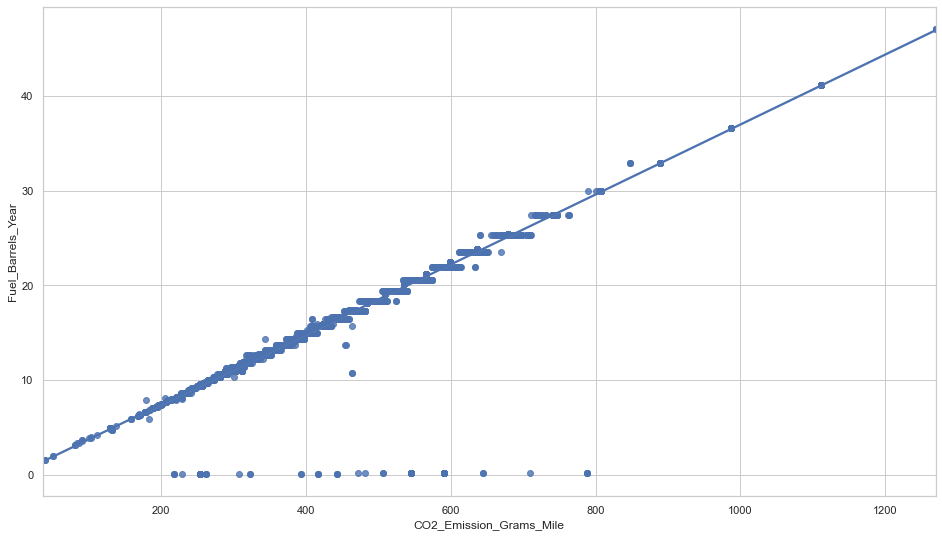

In [28]:
sns.regplot(x=vehicled_sorted.CO2_Emission_Grams_Mile, y=vehicled_sorted.Fuel_Barrels_Year);

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [29]:
df = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14],'Attend': [1,2,4,4,5,7,8,13]})
df

,Invited,Attend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

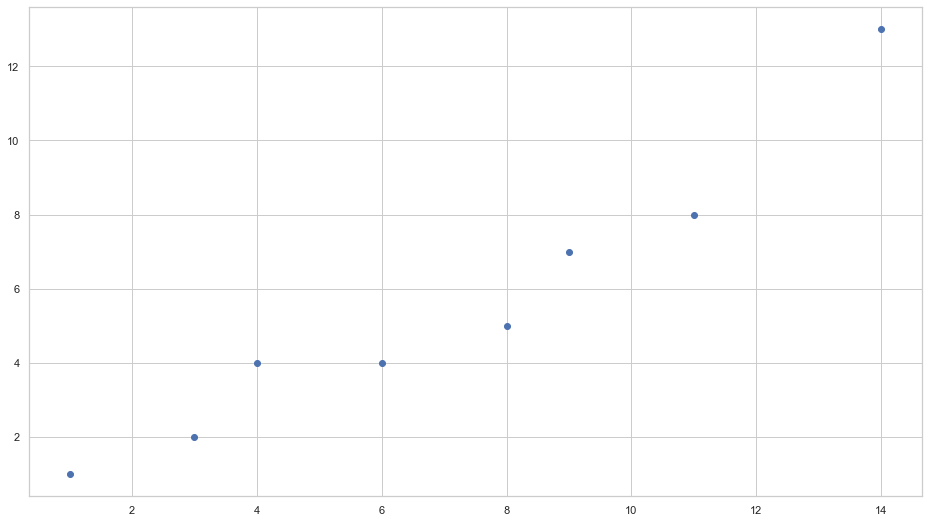

In [30]:
plt.scatter(x=df["Invited"], y=df["Attend"])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [31]:
results=smf.ols('Invited ~ Attend', data=df).fit()
results.summary()

C:\Users\pinil\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Invited   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           0.000102
Time:                        09:24:07   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
Attend         1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

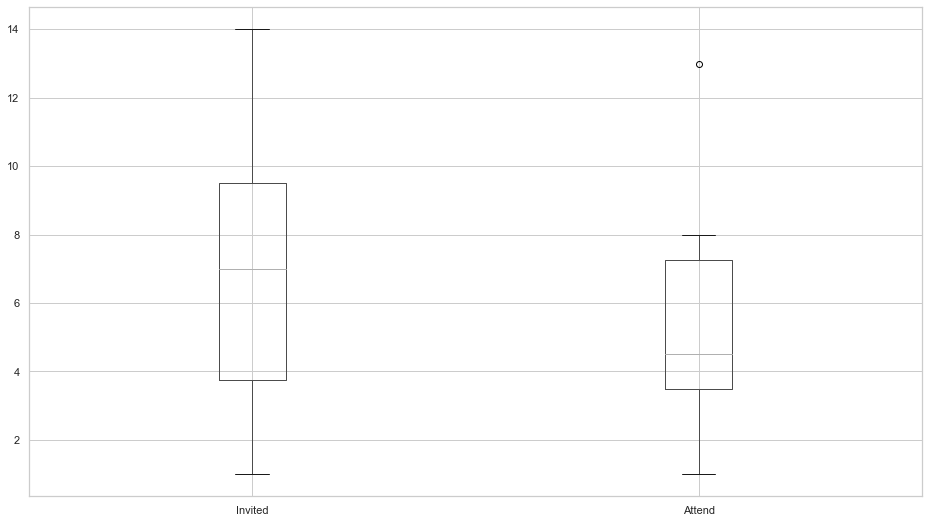

In [32]:
# with the quartils we can detect outliers
df.boxplot()

In [33]:
df.describe()

,Invited,Attend
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


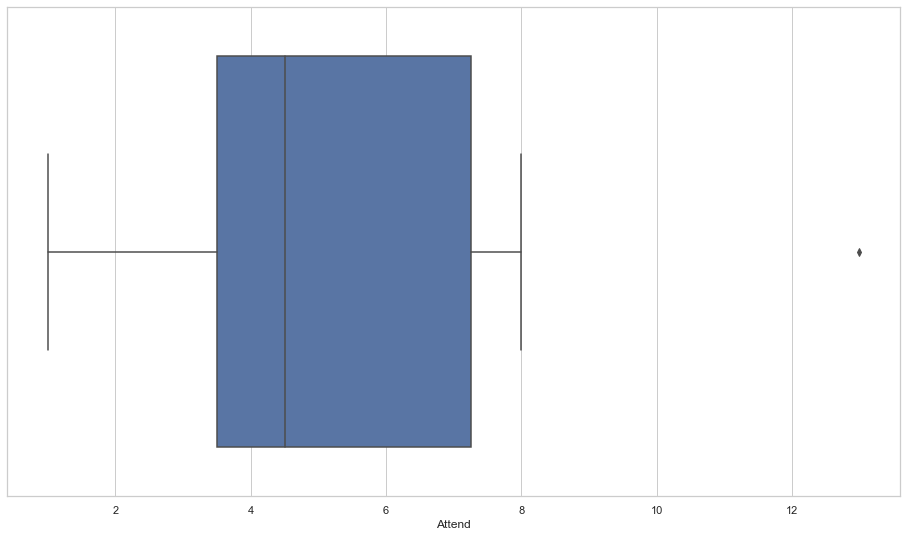

In [34]:
sns.boxplot(x=df["Attend"])
#Attend hat an outlier point

It looks like there are som outliers on "Attend"m on the boxplot have points beyond their whiskers.


In [35]:
d2=df

In [36]:
for x in ['Attend']:
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan
df2

NameError: name 'df2' is not defined

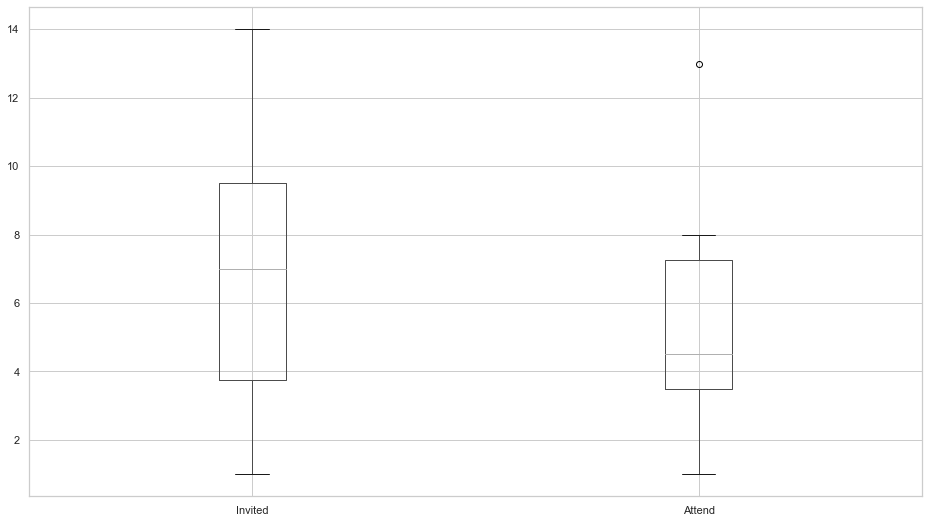

In [37]:
df2=df.dropna(axis = 0)
df2.boxplot()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

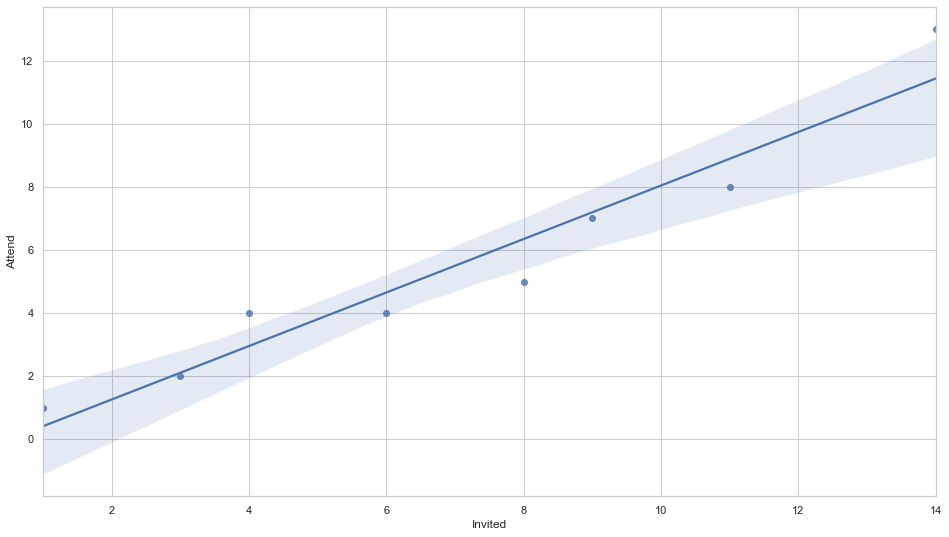

In [38]:
sns.regplot(x=df["Invited"], y=df["Attend"])


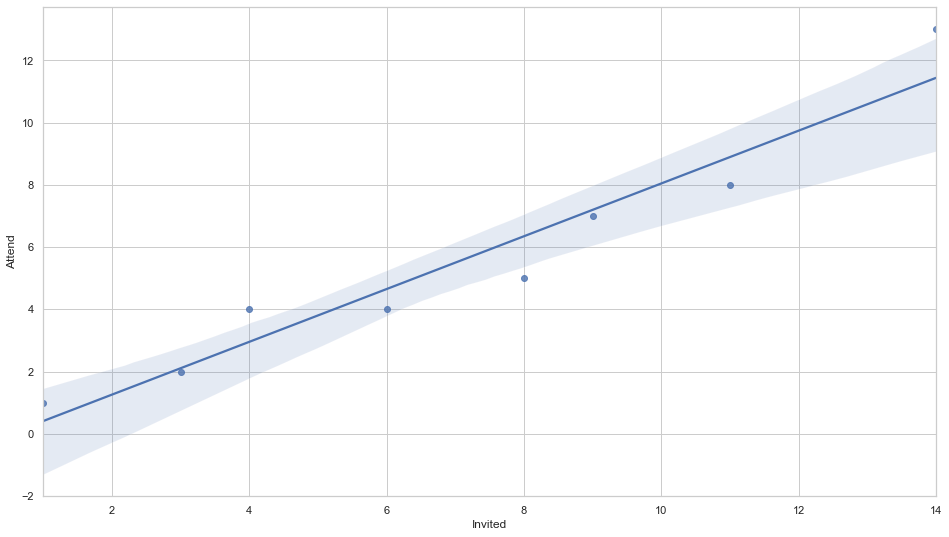

In [39]:
sns.regplot(x=df2["Invited"], y=df2["Attend"])

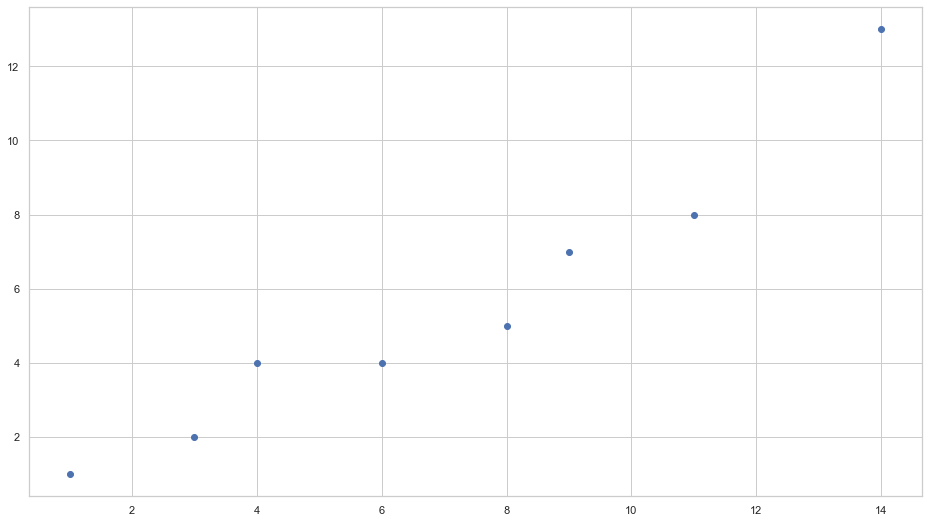

In [40]:
plt.scatter(x=df2["Invited"], y=df2["Attend"])

In [41]:
df.describe()

,Invited,Attend
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


In [42]:
df2.describe()

,Invited,Attend
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000
